In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
plt.style.use('seaborn')
sns.set(font_scale=1.5)
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('C:/Users/seob/Desktop/DATA/DS/Dataset/titanic/train.csv', index_col = 'PassengerId')
test = pd.read_csv('C:/Users/seob/Desktop/DATA/DS/Dataset/titanic/test.csv', index_col = 'PassengerId')
print(train.shape)
print(test.shape)

(891, 11)
(418, 10)


In [3]:
train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


PassengerId 컬럼은 파일을 불러올 때 인덱스로 불러왔으므로, 우리가 주의깊게 볼 컬럼은 총 11개입니다.

본격적으로 시작하기에 앞서 null값이 어디에 얼마나 있는지부터 확인하겠습니다.

In [4]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


train셋에서는 Age컬럼에 null이 많습니다.

In [5]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


test셋에서도 역시 Age컬럼에 null이 많습니다. 그 외에 주목할 점은 Fare컬럼에 1개의 null값이 있다는 사실입니다. 이 null은 나중에 적당한 값으로 채워넣어야 합니다.

![](http://)그렇다면, 일단 test셋의 Fare컬럼의 null값을 확인해보겠습니다.

In [6]:
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


PassengerId가 1044인 승객의 Fare이 null값입니다. 차후에 이 값을 다른 값으로 채워넣으면 됩니다. 
시각적으로 null 데이터들의 분포를 확인하겠습니다.

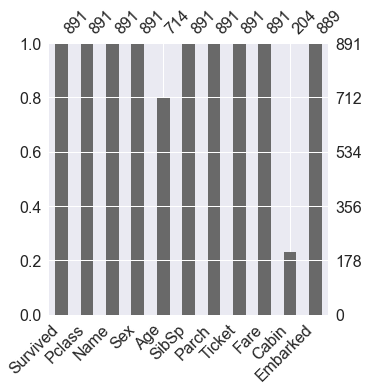

In [7]:
msno.bar(df=train, figsize=(5,5))

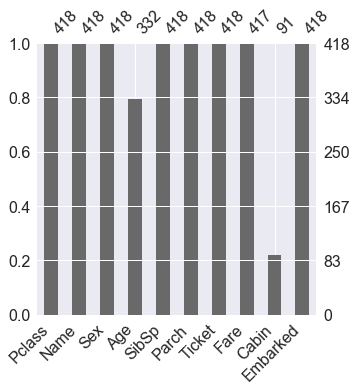

In [8]:
msno.bar(df=test, figsize=(5,5))

반드시 필요한 과정은 아니지만, missingno를 통해 이렇게 시각화를 하면 한 눈에 확인할 수 있어 용이합니다.

이제 데이터를 탐색해보겠습니다. 이 과정을 통해 어떤 컬럼의 데이터를 어떻게 활용할 것인지, 인사이트를 얻을 수 있습니다.
# Sex

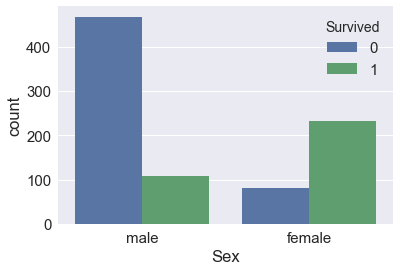

In [9]:
sns.countplot(data=train, x='Sex', hue='Survived')
plt.show()

남성의 경우 생존률이 굉장히 낮습니다. 여성의 경우 생존률이 높은 편입니다. 이를 수치로 확인해보겠습니다.

In [10]:
pd.pivot_table(data=train, index='Sex', values='Survived')
# train[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


* 여성의 경우 생존률은 74%이고, 남성의 경우 18%입니다. 굉장히 극명한 차이를 보이고 있네요.
* 이처럼 pandas의 pivot_table은 엑셀에서의 pivottable과 같은 기능을 지니고 있습니다.
* 또한, aggfunc 을 통해 다양한 수치 계산도 가능합니다.

In [11]:
pd.pivot_table(data=train, index='Sex', values='Survived', aggfunc='count')

,Survived
Sex,
female,314
male,577


* 총 여성 314명, 총 남성 577명 입니다. aggfunc='sum' 을 사용하면 그 중 생존한 여성과 남성의 수를 확인할 수 있습니다.
* 다음은 groupby를 통해 pivot_table의 기능을 구현한 코드입니다.

In [12]:
train[['Sex', 'Survived']].groupby(['Sex']).sum()

,Survived
Sex,
female,233
male,109


이처럼 count(), sum(), mean() 등이 가능합니다.

성별 컬럼에 대해서 좀 더 탐색해보겠습니다.

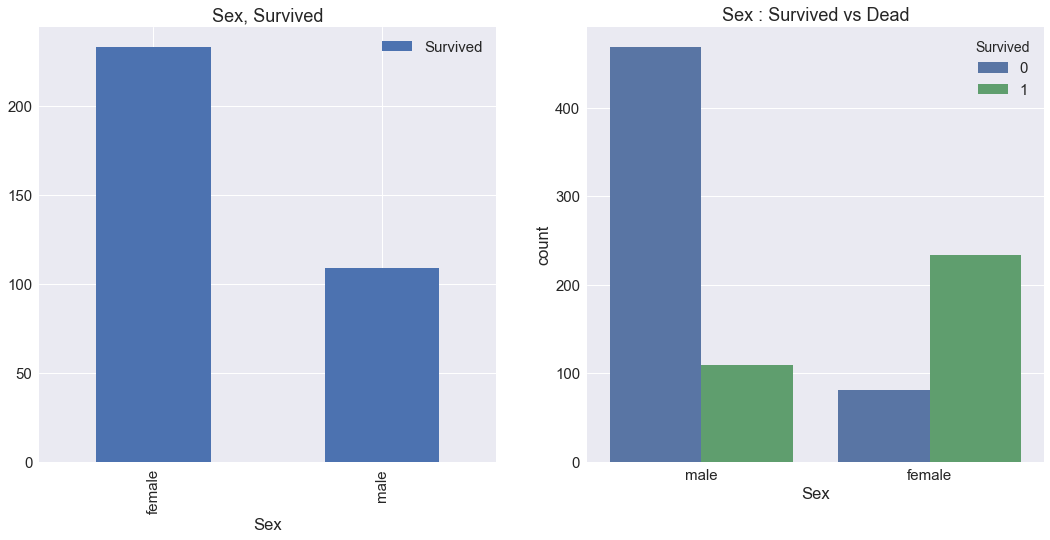

In [13]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
train[['Sex','Survived']].groupby(['Sex']).sum().plot.bar(ax=ax[0])
ax[0].set_title('Sex, Survived')
sns.countplot(data=train, x='Sex', hue='Survived', ax=ax[1])
ax[1].set_title('Sex : Survived vs Dead')
plt.show()

crosstab으로 확인해보겠습니다.

In [14]:
pd.crosstab(train.Sex, train.Survived, margins=True).style.background_gradient('summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


# Pclass

Pclass 컬럼을 탐색해보겠습니다.

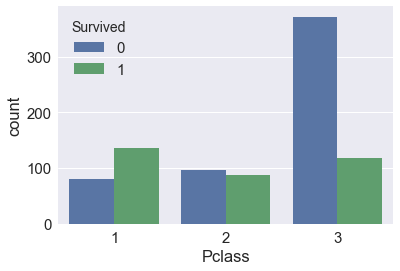

In [15]:
sns.countplot(data=train, x="Pclass", hue="Survived")

In [16]:
train[['Pclass', 'Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


- 1등급 객실의 승객은 136명이 살아남았고, 2등급 객실의 승객은 87명이 살아남았습니다. 3등급 객실의 경우 119명이 살아남았습니다.
- 참고로 1등급 객실이 가장 좋은 객실입니다.
- 이렇게만 보면 2등급 객실보다 3등급 객실의 승객이 더 많이 생존했습니다.
- 하지만, 과연 그러한지는 좀 더 확인해봐야 합니다. 이번에는 비율로 확인해보겠습니다.

In [17]:
pd.pivot_table(data=train, index='Pclass', values='Survived')

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


확인해본 결과,
- 1등급 객실의 생존률은 63%
- 2등급 객실의 생존률은 47%
- 3등급 객실의 생존률은 24%입니다.
가슴 아픈 일이지만, 생존을 하는 데에 있어서 고급 객실일수록 살아남을 확률이 높았다는 사실을 확인할 수 있습니다. 당연한 얘기일 수도 있지만 실제 데이터를 통해 확인하니 씁쓸하네요.

In [18]:
pd.crosstab(train.Pclass, train.Survived, margins=True).style.background_gradient('summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


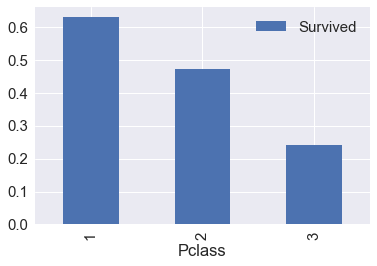

In [19]:
train[['Pclass','Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False).plot.bar()

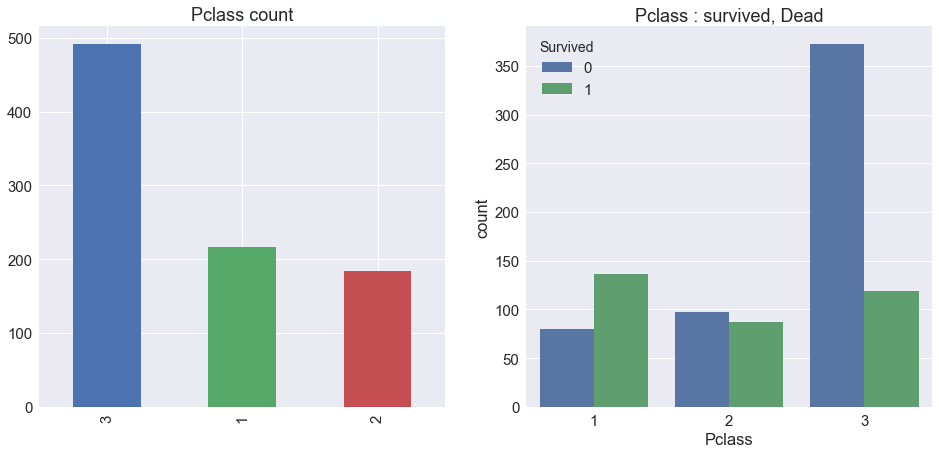

In [20]:
f,ax = plt.subplots(1, 2, figsize=(16,7))
train.Pclass.value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Pclass count')
sns.countplot(data=train, x='Pclass', hue='Survived', ax=ax[1])
ax[1].set_title('Pclass : survived, Dead')
plt.show()

# Embarked

승객들이 탄 선착장을 뜻하는 컬럼입니다.

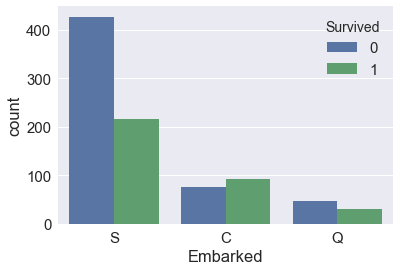

In [21]:
sns.countplot(data=train, x='Embarked', hue='Survived')

In [22]:
train[['Embarked','Survived']].groupby(['Embarked']).mean().sort_values(by='Survived', ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


- C선착장에서 탄 승객들의 생존률은 55%
- Q는 40%
- S는 34%입니다.

# Age

In [23]:
print('oldest person : {:.1f} years old'.format(train.Age.max()))
print('youngest person : {:.1f} years old'.format(train.Age.min()))
print('Average age : {:.1f} years old'.format(train.Age.mean()) )

oldest person : 80.0 years old
youngest person : 0.4 years old
Average age : 29.7 years old


- 나이 컬럼은 굉장히 촘촘하게 이루어져있는 연속변수이기 때문에 단순히 pivot_table, countplot 따위로 표현하면 안됩니다.
- 따라서 kdeplot을 사용하겠습니다.

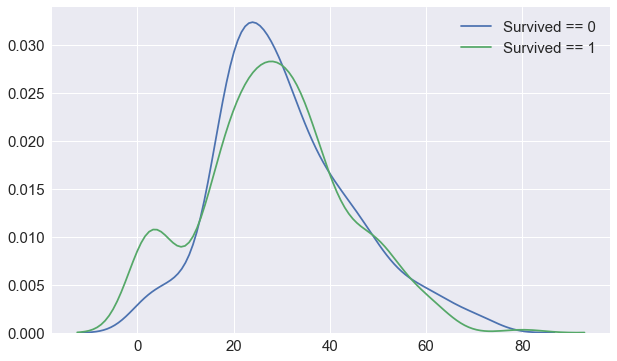

In [24]:
f, ax = plt.subplots(1, 1, figsize=(10,6))
sns.kdeplot(train[train['Survived'] == 0]['Age'], ax=ax)
sns.kdeplot(train[train['Survived'] == 1]['Age'], ax=ax)
plt.legend(['Survived == 0', 'Survived == 1'])
plt.show()

대략 18~40세 사이의 승객들의 생존률과 사망률이 둘 다 높습니다.

중요한 컬럼들에 대해서 알아봤으니, 이제는 컬럼들끼리 서로의 관계를 비교해보고 탐색해보겠습니다.

In [25]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


다양한 컬럼들이 있습니다. 데이터들을 통해 제가 궁금한 것, 혹은 검증해보고 싶은 것은
- (1) 나이가 어리고 요금을 많이낸 승객일 경우 생존률이 높을 것인가?
- (2) 1등급 객실에 묵은 여성일 경우 생존률이 높을 것인가?
- (3) 나이가 많을수록 좋은 객실에 묵었을 것이다.
- (4) 나이가 어린 여성일수록 생존률이 높을 것이다.
- (5) 가족수가 많을수록 생존률이 높을 것이다.
- (6) Mr의 경우 사망률이 높을 것이다.

차근차근 확인해보겠습니다.

## (1) 나이가 어리고 요금을 많이낸 승객일 경우 생존률이 높을 것인가?

산점도를 그려서 확인해보겠습니다.

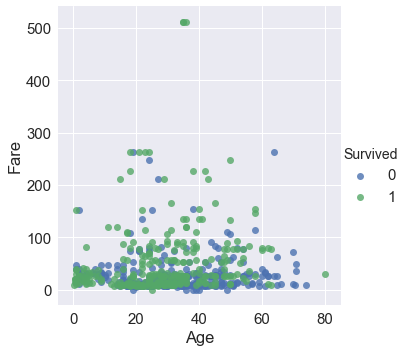

In [26]:
sns.lmplot(data=train, x='Age', y='Fare', hue='Survived',fit_reg=False)

산점도를 통해 연령, 요금, 생존, 세 가지 컬럼에 따른 분포도를 확인할 수 있습니다. 다만, 자세히 보면 요금이 500이상인 부분에 outlier가 있음을 알 수 있습니다. 이 이상치 때문에 산점도가 부정확해질 수 있으므로 적당히 커트하겠습니다.

In [27]:
fare2 = train[train['Fare'] <= 150]
fare2.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


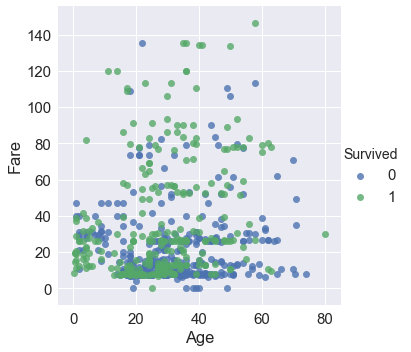

In [28]:
sns.lmplot(data=fare2, x='Age', y='Fare', hue='Survived', fit_reg=False)

처음 생각했던 가설인 '나이가 어리고 요금을 많이 냈을수록 생존률이 높을 것이다'는 딱히, 유효한 가설은 아닌 것 같습니다.

## (2) 1등급 객실에 묵은 여성일 경우 생존률이 높을 것인가?

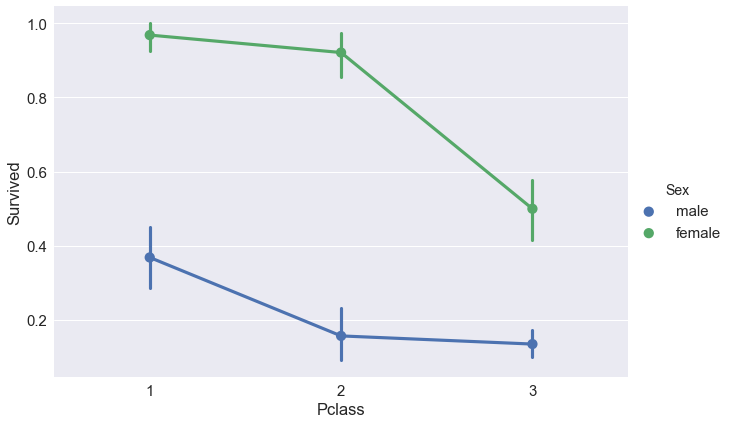

In [29]:
sns.factorplot(data=train, x='Pclass', y='Survived', hue='Sex', size=6, aspect=1.5)

1등급 객실에 묵은 여성의 경우 생존률이 매우 높았다.

## (3) 나이가 많을수록 좋은 객실에 묵었을 것이다.

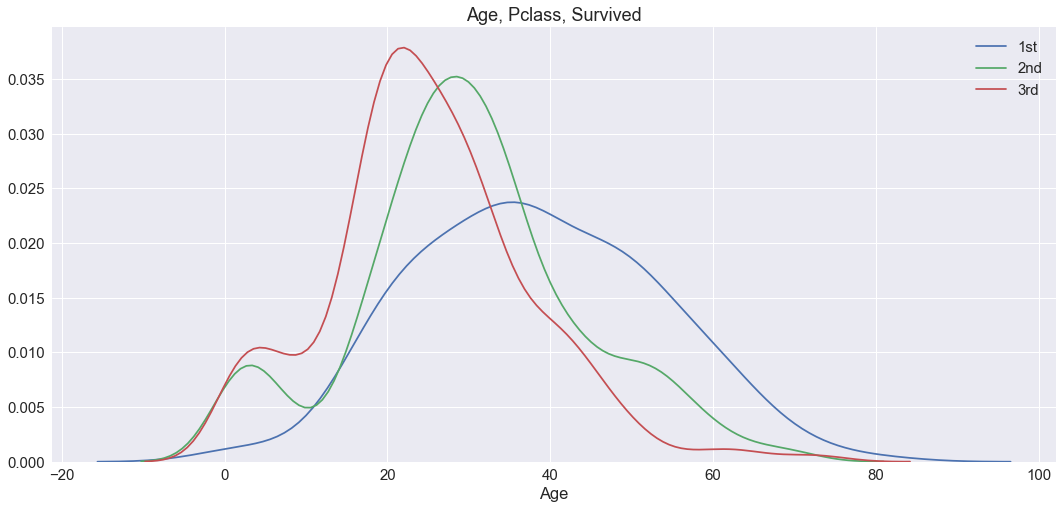

In [30]:
f, ax = plt.subplots(1,1,figsize=(18,8))
sns.kdeplot(data = train[train['Pclass'] == 1]['Age'], ax=ax)
sns.kdeplot(data = train[train['Pclass'] == 2]['Age'], ax=ax)
sns.kdeplot(data = train[train['Pclass'] == 3]['Age'], ax=ax)
ax.set_title('Age, Pclass, Survived')
plt.xlabel('Age')
plt.legend(['1st', '2nd', '3rd'])

- 20대에서는 3등급 객실에 가장 많이 묵었고
- 30대에서는 2등급 객실에 가장 많이 묵었고
- 40대 언저리에서는 1등급 객실에 가장 많이 묵었다.

## (4) 나이가 어린 여성일수록 생존률이 높을 것이다.

먼저 성별 데이터를 숫자로 바꿔주겠습니다.

In [31]:
train['Sex'] = train['Sex'].map({'female':0, 'male':1})
test['Sex'] = test['Sex'].map({'female':0, 'male':1})

In [32]:
train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C


성별 컬럼의 데이터가 1과 0으로 바뀐 것을 확인할 수 있습니다. 이제 violinplot으로 성별과 나이, 생존률을 함께 보겠습니다.

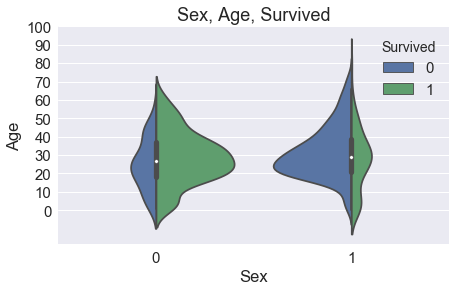

In [33]:
f, ax = plt.subplots(1, 1, figsize=(7,4))
sns.violinplot(data=train, x="Sex", y="Age", hue="Survived", scale='count', split=True, ax=ax)
ax.set_title('Sex, Age, Survived')  # plt.title('')
plt.yticks(range(0, 100+10, 10))
plt.show()

0은 여성, 1은 남성입니다. 여성의 경우 무조건 나이가 어릴수록 생존률이 높은 건 아닌 것으로 보입니다.

나머지 물음에 대해서는 컬럼 인코딩을 진행하면서 확인해보겠습니다.

# encoding

In [34]:
train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C


머신러닝 모델은 숫자만 인식합니다. 따라서, 컬럼의 values에 문자가 들어있는 경우 적절하게 숫자로 변환하거나 빼주는게 좋습니다.

## Name encoding

먼저 이름을 변환해보겠습니다.

In [35]:
train['Name'].value_counts()

Taylor, Mr. Elmer Zebley                                     1
Gilnagh, Miss. Katherine "Katie"                             1
Troutt, Miss. Edwina Celia "Winnie"                          1
Sawyer, Mr. Frederick Charles                                1
Baumann, Mr. John D                                          1
Newell, Miss. Madeleine                                      1
Artagaveytia, Mr. Ramon                                      1
Homer, Mr. Harry ("Mr E Haven")                              1
Gaskell, Mr. Alfred                                          1
Butt, Major. Archibald Willingham                            1
Gallagher, Mr. Martin                                        1
Jenkin, Mr. Stephen Curnow                                   1
Turkula, Mrs. (Hedwig)                                       1
Nakid, Miss. Maria ("Mary")                                  1
Angle, Mrs. William A (Florence "Mary" Agnes Hughes)         1
Meanwell, Miss. (Marion Ogden)                         

확인해보니 이름에는 Mr, Miss, Mrs, Master, Dr, Mme, Rev 등 다양한 키워드가 들어있습니다.
- 새로운 컬럼 Title을 만들어 Mr, Miss, Mrs, Master로 분류하고, 나머지 키워드는 모두 Other로 변환하겠습니다.

In [36]:
train.loc[train['Name'].str.contains('Mr'), 'Title'] = 'Mr'
train.loc[train['Name'].str.contains('Mrs'), 'Title'] = 'Mrs'
train.loc[train['Name'].str.contains('Miss'), 'Title'] = 'Miss'
train.loc[train['Name'].str.contains('Master'), 'Title'] = 'Master'

test.loc[test['Name'].str.contains('Mr'), 'Title'] = 'Mr'
test.loc[test['Name'].str.contains('Mrs'), 'Title'] = 'Mrs'
test.loc[test['Name'].str.contains('Miss'), 'Title'] = 'Miss'
test.loc[test['Name'].str.contains('Master'), 'Title'] = 'Master'

In [37]:
train['Title'].head()

PassengerId
1      Mr
2     Mrs
3    Miss
4     Mrs
5      Mr
Name: Title, dtype: object

In [38]:
pd.crosstab(index=train['Sex'], columns=train['Title']).style.background_gradient('summer_r')

Title,Master,Miss,Mr,Mrs
Sex,,,,
0,0,182,0,127
1,40,0,518,0


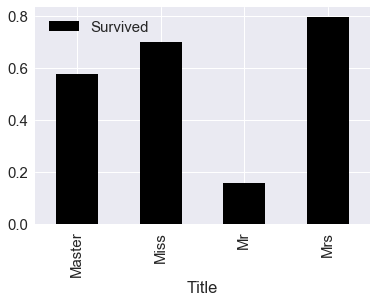

In [39]:
train[['Title', 'Survived']].groupby(['Title']).mean().plot.bar(color='black')

Title 컬럼의 null에 Other을 넣겠습니다.

In [40]:
train.loc[train['Title'].isnull(), 'Title'] = 'Other'

In [41]:
train['Title'].isnull().any()
# null이 하나라도 있으면 True 출력

False

## Title을 숫자로 변환

- machine learning 모델은 오로지 숫자만 인식할 수 있습니다.
- 일단 단순하게 Mr는 1로, Mrs는 2로, Miss는 3으로, Master는 4로, Other은 5로 바꾸겠습니다.

In [42]:
train.loc[train['Title'] == 'Mr', 'Title'] = 1
train.loc[train['Title'] == 'Mrs', 'Title'] = 2
train.loc[train['Title'] == 'Miss', 'Title'] = 3
train.loc[train['Title'] == 'Master', 'Title'] = 4
train.loc[train['Title'] == 'Other', 'Title'] = 5

test.loc[test['Title'] == 'Mr', 'Title'] = 1
test.loc[test['Title'] == 'Mrs', 'Title'] = 2
test.loc[test['Title'] == 'Miss', 'Title'] = 3
test.loc[test['Title'] == 'Master', 'Title'] = 4
test.loc[test['Title'] == 'Other', 'Title'] = 5

In [43]:
train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,2


## FamilySize

In [44]:
train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,2


가족구성원 수를 구해보려 합니다. SibSp(형제자매) + parch(부모자녀) + 나(1) = FamilySize 입니다.

In [45]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

In [46]:
train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,2,2


## FamilyType

In [47]:
train.FamilySize.value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

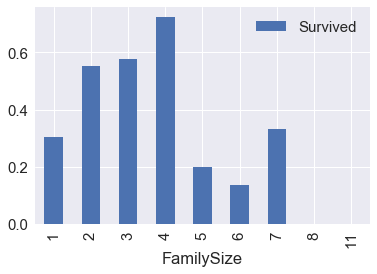

In [48]:
train[['FamilySize', 'Survived']].groupby(['FamilySize']).mean().plot.bar()

- 생존률이 40%미만인 승객들은 5~7인 가족이거나 혼자인 경우였습니다.
- 2~4인 가족의 경우 생존률이 50%를 넘었습니다.
- 특이한 점은 8인과 11인의 가족구성원을 지닌 승객의 경우 생존률이 거의 제로에 가까웠습니다.
- 단순히 가족구성원의 수를 기준으로 하지않고, 생존률을 기준으로 분류하겠습니다.

In [49]:
train.loc[train['FamilySize'] == 1, 'FamilyType'] = 'Low_Sur'
train.loc[(train['FamilySize'] >= 5) & (train['FamilySize'] <= 7), 'FamilyType'] = 'Low_Sur'
train.loc[(train['FamilySize'] >= 2) & (train['FamilySize'] <= 4 ), 'FamilyType'] = 'High_Sur'
train.loc[(train['FamilySize'] == 8) | (train['FamilySize'] == 11 ), 'FamilyType'] = 'Verylow_Sur'

test.loc[test['FamilySize'] == 1, 'FamilyType'] = 'Low_Sur'
test.loc[(test['FamilySize'] >= 5) & (test['FamilySize'] <= 7), 'FamilyType'] = 'Low_Sur'
test.loc[(test['FamilySize'] >= 2) & (test['FamilySize'] <= 4 ), 'FamilyType'] = 'High_Sur'
test.loc[(test['FamilySize'] == 8) | (test['FamilySize'] == 11 ), 'FamilyType'] = 'Verylow_Sur'

In [50]:
train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,FamilyType
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2,High_Sur
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,2,2,High_Sur
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3,1,Low_Sur
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,2,2,High_Sur
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1,1,Low_Sur
6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q,1,1,Low_Sur
7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S,1,1,Low_Sur
8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S,4,5,Low_Sur
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S,2,3,High_Sur


In [51]:
train.FamilyType.isnull().any()

False

잘 된 것 같습니다.

다른 컬럼들을 인코딩하기 전에, 아까 세웠던 나머지 가설 두 개를 마저 확인해보겠습니다.

## (5) 가족수가 많을수록 생존률이 높을 것이다.
## (6) Mr의 경우 사망률이 높을 것이다.

In [52]:
train.FamilySize.value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

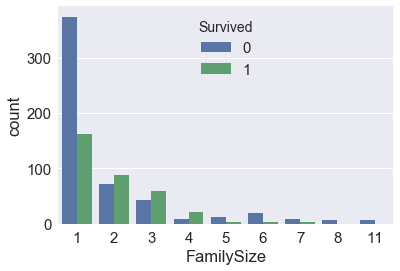

In [53]:
sns.countplot(data=train, x='FamilySize', hue='Survived')

In [54]:
pd.pivot_table(data=train, index='FamilySize', values='Survived')

,Survived
FamilySize,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


4인가정이 생존률 72%로 제일 높았고, 그 다음으로 3인가정이 생존률 58%로 높았다. 가족수가 많은 5,6,7,8,11인 가족은 2,3,4인 가족보다 생존률이 현저히 낮았으므로, 처음 세웠던 가설은 유효하지 않음을 알 수 있다.

다음은 Mr의 사망률이 높다는 가정을 확인해보겠다.

In [55]:
pd.pivot_table(data=train, index="Title", values="Survived")

,Survived
Title,
1,0.158301
2,0.795276
3,0.697802
4,0.575000
5,0.375000


Mr의 생존률은 16%로 제일 낮았다. 반면, Mrs와 Miss의 경우 생존률이 높았다.
- 처음 세웠던 가설이 맞았음을 확인할 수 있다.

이처럼 당연하다고 생각했던 것이 맞을 때도 있고, 가족수가 많을수록 생존률이 높을 것이란 가설이 틀렸던 것처럼 당연하다고 생각한 것이 당연하지 않다는게 데이터로 확인될 때도 있다.

이제 다른 컬럼들을 마저 인코딩하겠다

## Fare 인코딩

아까 전 확인한 test셋의 Fare컬럼에 null이 하나 있었다. null이 있으면 머신러닝 모델이 학습을 할 수 없으므로, 다른 값으로 채워야한다. null이 하나뿐이므로 0으로 채워도 무방할 것 같다.

In [56]:
test[test.Fare.isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,FamilyType
PassengerId,,,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",1,60.5,0,0,3701,NaN,NaN,S,1,1,Low_Sur


In [57]:
train['Fare_fillin'] = train['Fare']
test['Fare_fillin'] = test['Fare']

In [58]:
test.loc[test['Fare'].isnull(), 'Fare_fillin'] = 0
test.loc[test['Fare'].isnull(), ['Fare', 'Fare_fillin']]

,Fare,Fare_fillin
PassengerId,,
1044,NaN,0.0


In [59]:
test.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,FamilyType,Fare_fillin
PassengerId,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,1,1,Low_Sur,7.8292
893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S,2,2,High_Sur,7.0000


## Embarked 인코딩

In [60]:
train.Embarked.value_counts().to_frame()

,Embarked
S,644
C,168
Q,77


Embarked --> One hot encoding!

In [61]:
train['Embarked_C'] = train['Embarked'] == 'C'
train['Embarked_S'] = train['Embarked'] == 'S'
train['Embarked_Q'] = train['Embarked'] == 'Q'

test['Embarked_C'] = test['Embarked'] == 'C'
test['Embarked_S'] = test['Embarked'] == 'S'
test['Embarked_Q'] = test['Embarked'] == 'Q'

In [62]:
train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,FamilyType,Fare_fillin,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2,High_Sur,7.2500,False,True,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,2,2,High_Sur,71.2833,True,False,False


In [63]:
test.head(1)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,FamilyType,Fare_fillin,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,1,1,Low_Sur,7.8292,False,False,True


## Title 인코딩

In [64]:
train.Title.value_counts()

1    518
3    182
2    127
4     40
5     24
Name: Title, dtype: int64

- 아까 Title의 Mr,Mrs,Miss,Master,Other을 숫자 1,2,3,4,5로 바꿨었다.
- 그런데 문제가 하나 있다.
- 머신러닝 모델은 인간으로선 불가능한 수많은 데이터들을 분석하고 알고리즘에 따라 예측 및 분류가 가능하지만,
- 의외로 멍충멍충한 부분이 있는데, 그 부분 때문에 우리는 one hot encoding 이란 걸 해줘야한다.
- 머신러닝 모델은 솟자만을 인식하는데, 만약, Mr = 1이고, Mrs=2, Miss=3 이라고 한다면 머신러닝 모델은 1+2=3이니까 Mr와 Mrs를 더하면 Miss가 되는 것 아닌가? 라는 착각을 하게 된다.
- 이러한 부분이 모델의 성능을 저하시키는 요인이 될 수 있으므로 one hot encoding을 해줘야 한다. 판다스와 사이킷런에는 이런 원핫인코딩을 편리하게 구현해줄 수 있는 기능이 존재하는데, 아직 잘 몰라서 걍 수작업으로 일일이 했음.

In [65]:
train['Mr'] = train['Title'] == 1
train['Mrs'] = train['Title'] == 2
train['Miss'] = train['Title'] == 3
train['Master'] = train['Title'] == 4
train['Other'] = train['Title'] == 5

test['Mr'] = test['Title'] == 1
test['Mrs'] = test['Title'] == 2
test['Miss'] = test['Title'] == 3
test['Master'] = test['Title'] == 4
test['Other'] = test['Title'] == 5


In [66]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,FamilyType,Fare_fillin,Embarked_C,Embarked_S,Embarked_Q,Mr,Mrs,Miss,Master,Other
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,...,High_Sur,7.2500,False,True,False,True,False,False,False,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,...,High_Sur,71.2833,True,False,False,False,True,False,False,False
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,Low_Sur,7.9250,False,True,False,False,False,True,False,False
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,...,High_Sur,53.1000,False,True,False,False,True,False,False,False
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,...,Low_Sur,8.0500,False,True,False,True,False,False,False,False


## FamilyType One hot encoding

이어서 FamilyType도 원핫인코딩하겠습니다.

In [67]:
train.FamilyType.value_counts().to_frame()

,FamilyType
Low_Sur,586
High_Sur,292
Verylow_Sur,13


In [68]:
train['FamilyType_Low_Sur'] = train['FamilyType'] == 'Low_Sur'
train['FamilyType_High_Sur'] = train['FamilyType'] == 'High_Sur'
train['FamilyType_Verylow_Sur'] = train['FamilyType'] == 'Verylow_Sur'

test['FamilyType_Low_Sur'] = test['FamilyType'] == 'Low_Sur'
test['FamilyType_High_Sur'] = test['FamilyType'] == 'High_Sur'
test['FamilyType_Verylow_Sur'] = test['FamilyType'] == 'Verylow_Sur'

In [69]:
train.FamilyType_Verylow_Sur.isnull().any()

False

In [70]:
train.FamilyType_Low_Sur.isnull().any()

False

In [71]:
train.FamilyType_High_Sur.isnull().any()

False

In [72]:
train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Embarked_S,Embarked_Q,Mr,Mrs,Miss,Master,Other,FamilyType_Low_Sur,FamilyType_High_Sur,FamilyType_Verylow_Sur
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,...,True,False,True,False,False,False,False,False,True,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,...,False,False,False,True,False,False,False,False,True,False


In [73]:
test.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,Embarked_S,Embarked_Q,Mr,Mrs,Miss,Master,Other,FamilyType_Low_Sur,FamilyType_High_Sur,FamilyType_Verylow_Sur
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,...,False,True,True,False,False,False,False,True,False,False
893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S,...,True,False,False,True,False,False,False,False,True,False


    
## FamilySize 인코딩

In [74]:
# train.loc[train['FamilySize'] == 1, 'FamilyType'] = 'Single'
# train.loc[(train['FamilySize'] >= 2) & (train['FamilySize'] <5), 'FamilyType'] = 'Nuclear'
# train.loc[train['FamilySize'] >= 5, 'FamilyType'] = 'Big'

# test.loc[test['FamilySize'] == 1, 'FamilyType'] = 'Single'
# test.loc[(test['FamilySize'] >= 2) & (test['FamilySize'] <5), 'FamilyType'] = 'Nuclear'
# test.loc[test['FamilySize'] >= 5, 'FamilyType'] = 'Big'

In [75]:
# sns.countplot(data=train, x='FamilyType', hue='Survived')

In [76]:
# pd.pivot_table(data=train, index="FamilyType", values="Survived")

## Age 인코딩

In [77]:
train['Child'] = train['Age'] < 15
train['Adult'] = (train['Age'] >= 15) & (train['Age'] <= 40)
train['Old'] = train['Age'] > 40

test['Child'] = test['Age'] < 15
test['Adult'] = (test['Age'] >= 15) & (test['Age'] <= 40)
test['Old'] = test['Age'] > 40

## Title 인코딩

In [78]:
# train.loc[train['Title'] == 'Mr', 'Title_enco'] = 1
# train.loc[train['Title'] == 'Mrs', 'Title_enco'] = 2
# train.loc[train['Title'] == 'Miss', 'Title_enco'] = 3
# train.loc[train['Title'] == 'Master', 'Title_enco'] = 4
# train.loc[train['Title'] == 'Other', 'Title_enco'] = 5

# test.loc[test['Title'] == 'Mr', 'Title_enco'] = 1
# test.loc[test['Title'] == 'Mrs', 'Title_enco'] = 2
# test.loc[test['Title'] == 'Miss', 'Title_enco'] = 3
# test.loc[test['Title'] == 'Master', 'Title_enco'] = 4
# test.loc[test['Title'] == 'Other', 'Title_enco'] = 5

In [79]:
# test.loc[test['Title_enco'].isnull(), 'Title_enco'] = 5

In [80]:
train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Mrs,Miss,Master,Other,FamilyType_Low_Sur,FamilyType_High_Sur,FamilyType_Verylow_Sur,Child,Adult,Old
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,...,False,False,False,False,False,True,False,False,True,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,...,True,False,False,False,False,True,False,False,True,False


이 정도면 된 것 같습니다. test 데이터셋도 확인해보겠습니다.

In [81]:
test.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,Mrs,Miss,Master,Other,FamilyType_Low_Sur,FamilyType_High_Sur,FamilyType_Verylow_Sur,Child,Adult,Old
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,...,False,False,False,False,True,False,False,False,True,False
893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S,...,True,False,False,False,False,True,False,False,False,True


## 불필요한 컬럼은 날립니다.

In [82]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Title', 'FamilySize', 'FamilyType',
       'Fare_fillin', 'Embarked_C', 'Embarked_S', 'Embarked_Q', 'Mr', 'Mrs',
       'Miss', 'Master', 'Other', 'FamilyType_Low_Sur', 'FamilyType_High_Sur',
       'FamilyType_Verylow_Sur', 'Child', 'Adult', 'Old'],
      dtype='object')

In [83]:
train.drop(['Name','SibSp','Parch','Ticket','Fare','Cabin','Embarked','Title','FamilySize'], axis=1, inplace=True)
train.head(1)

,Survived,Pclass,Sex,Age,FamilyType,Fare_fillin,Embarked_C,Embarked_S,Embarked_Q,Mr,Mrs,Miss,Master,Other,FamilyType_Low_Sur,FamilyType_High_Sur,FamilyType_Verylow_Sur,Child,Adult,Old
PassengerId,,,,,,,,,,,,,,,,,,,,
1,0,3,1,22.0,High_Sur,7.25,False,True,False,True,False,False,False,False,False,True,False,False,True,False


In [84]:
test.drop(['Name','SibSp','Parch','Ticket','Fare','Cabin','Embarked','Title','FamilySize'], axis=1, inplace=True)
test.head(1)

,Pclass,Sex,Age,FamilyType,Fare_fillin,Embarked_C,Embarked_S,Embarked_Q,Mr,Mrs,Miss,Master,Other,FamilyType_Low_Sur,FamilyType_High_Sur,FamilyType_Verylow_Sur,Child,Adult,Old
PassengerId,,,,,,,,,,,,,,,,,,,
892,3,1,34.5,Low_Sur,7.8292,False,False,True,True,False,False,False,False,True,False,False,False,True,False


In [85]:
train.isnull().any()

Survived                  False
Pclass                    False
Sex                       False
Age                        True
FamilyType                False
Fare_fillin               False
Embarked_C                False
Embarked_S                False
Embarked_Q                False
Mr                        False
Mrs                       False
Miss                      False
Master                    False
Other                     False
FamilyType_Low_Sur        False
FamilyType_High_Sur       False
FamilyType_Verylow_Sur    False
Child                     False
Adult                     False
Old                       False
dtype: bool

Age컬럼에 null값이 있습니다. 놓칠뻔했네요. drop으로 날려줍니다.

In [86]:
train.drop(['Age'], axis=1, inplace=True)
test.drop(['Age'], axis=1, inplace=True)

In [87]:
print(train.isnull().any())
print(test.isnull().any())

Survived                  False
Pclass                    False
Sex                       False
FamilyType                False
Fare_fillin               False
Embarked_C                False
Embarked_S                False
Embarked_Q                False
Mr                        False
Mrs                       False
Miss                      False
Master                    False
Other                     False
FamilyType_Low_Sur        False
FamilyType_High_Sur       False
FamilyType_Verylow_Sur    False
Child                     False
Adult                     False
Old                       False
dtype: bool
Pclass                    False
Sex                       False
FamilyType                False
Fare_fillin               False
Embarked_C                False
Embarked_S                False
Embarked_Q                False
Mr                        False
Mrs                       False
Miss                      False
Master                    False
Other                     Fa

문자로 구성된 FamilyType컬럼도 날리겠습니다.

In [88]:
train.drop(['FamilyType'], axis=1, inplace=True)
test.drop(['FamilyType'], axis=1, inplace=True)

In [89]:
train.head(2)

,Survived,Pclass,Sex,Fare_fillin,Embarked_C,Embarked_S,Embarked_Q,Mr,Mrs,Miss,Master,Other,FamilyType_Low_Sur,FamilyType_High_Sur,FamilyType_Verylow_Sur,Child,Adult,Old
PassengerId,,,,,,,,,,,,,,,,,,
1,0,3,1,7.2500,False,True,False,True,False,False,False,False,False,True,False,False,True,False
2,1,1,0,71.2833,True,False,False,False,True,False,False,False,False,True,False,False,True,False


이제 진짜 끝입니다. 모델에 넣고 돌려보겠습니다.

# Training and Prediction

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [91]:
X_train = train.drop('Survived', axis=1).values
target_label = train['Survived'].values
X_test = test.values

In [92]:
X_tr, X_vid, y_tr, y_vid = train_test_split(X_train, target_label,
                                           test_size=0.3, random_state=2019)

In [93]:
print(X_tr.shape)
print(X_vid.shape)
print(y_tr.shape)
print(y_vid.shape)

(623, 17)
(268, 17)
(623,)
(268,)


## Random Forest

In [94]:
model = RandomForestClassifier() #max_features=10, n_estimators=13, random_state=0
model.fit(X_tr, y_tr)
prediction = model.predict(X_vid)
print('The accuracy of the RandomForest is', metrics.accuracy_score(prediction, y_vid))

The accuracy of the RandomForest is 0.7910447761194029


## Logistic Regression

In [95]:
model = LogisticRegression(random_state=0)
model.fit(X_tr, y_tr)
prediction1 = model.predict(X_vid)
print('The accuracy of the LogisticRegression is', metrics.accuracy_score(prediction1, y_vid))

The accuracy of the LogisticRegression is 0.7985074626865671


## Decision Tree

In [96]:
model = DecisionTreeClassifier(max_depth=10, random_state=0)
model.fit(X_tr, y_tr)
prediction2 = model.predict(X_vid)
print('The accuracy of the DecisionTree is', metrics.accuracy_score(prediction2, y_vid))

The accuracy of the DecisionTree is 0.8059701492537313


# XGBoost

In [97]:
model = xg.XGBClassifier(learning_rate=0.1, n_estimators=10)
model.fit(X_tr, y_tr)
prediction = model.predict(X_vid)
print('accuracy : ', metrics.accuracy_score(prediction, y_vid))

accuracy :  0.8283582089552238


C:\Users\seob\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Submission

In [98]:
submission = pd.read_csv('C:/Users/seob/Desktop/DATA/DS/Dataset/Titanic/sample_submission.csv')
submission.head(2)

,PassengerId,Survived
0,892,0
1,893,0


In [99]:
prediction = model.predict(X_test)
submission['Survived'] = prediction

C:\Users\seob\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [100]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [101]:
submission.to_csv('C:/Users/seob/Desktop/SCRAP,ML,DL/kaggle_korea_kernel_study/0129titanic.csv', index=False)